<a href="https://colab.research.google.com/github/WahyuKhairi06/DataMining_WahyuKhairi_2311531009/blob/main/UAS_DataMining_Breast_cancers_WahyuKhairi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import library**

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

# **2. Import dataset**

In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/WahyuKhairi06/DataMining_WahyuKhairi_2311531009/refs/heads/main/breast-cancer.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


# **3. Exploratory Data**

In [62]:
print("Ukuran data:", df.shape)
print("\nInfo Data:")
print(df.info())


Ukuran data: (569, 32)

Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    floa

In [63]:
print("\nJumlah data kosong:")
print(df.isnull().sum())


Jumlah data kosong:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [64]:
print("\nStatistik deskriptif:")
print(df.describe())


Statistik deskriptif:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064

**Visualisasi distribusi label**

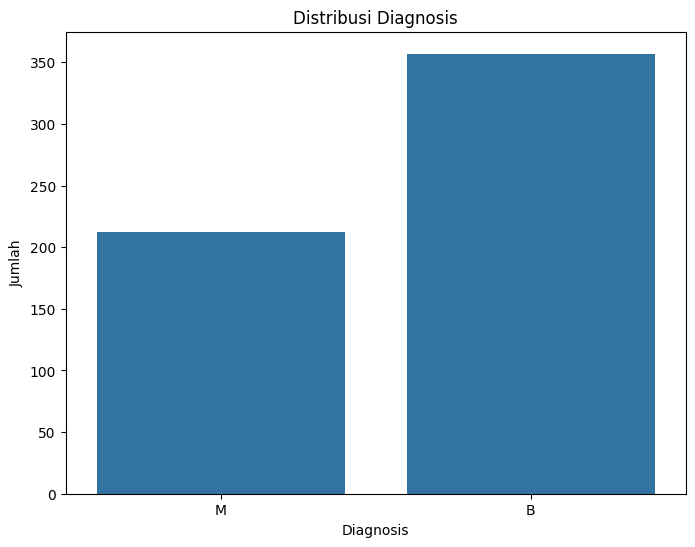

In [65]:
# prompt: buatkan visualiasasi distribusi tabelnya

plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribusi Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Jumlah')
plt.show()

**Korelasi**

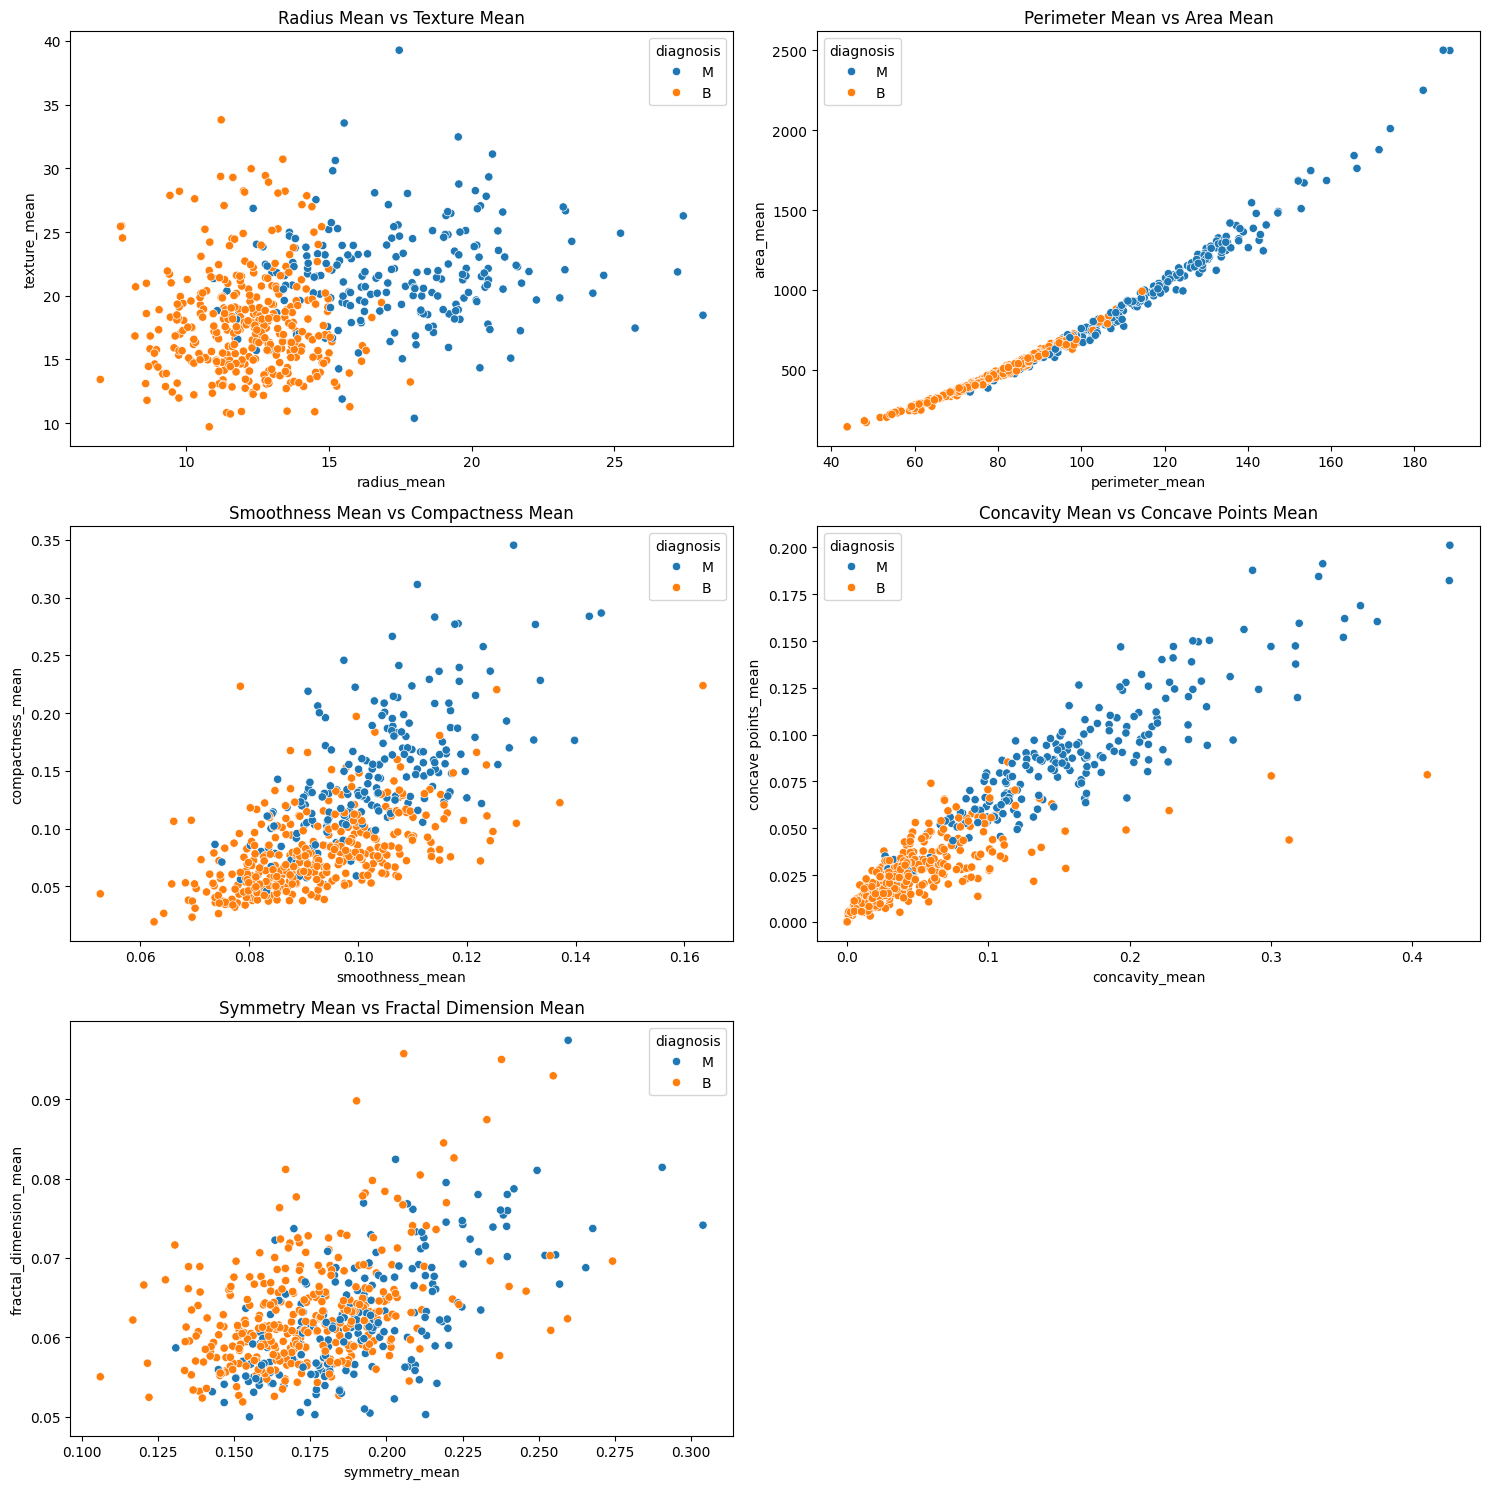

In [66]:
# prompt: buat scatter plot nya, dan susun gambar

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Radius Mean vs Texture Mean')
sns.scatterplot(x='perimeter_mean', y='area_mean', hue='diagnosis', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Perimeter Mean vs Area Mean')
sns.scatterplot(x='smoothness_mean', y='compactness_mean', hue='diagnosis', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Smoothness Mean vs Compactness Mean')
sns.scatterplot(x='concavity_mean', y='concave points_mean', hue='diagnosis', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Concavity Mean vs Concave Points Mean')
sns.scatterplot(x='symmetry_mean', y='fractal_dimension_mean', hue='diagnosis', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Symmetry Mean vs Fractal Dimension Mean')
fig.delaxes(axes[2, 1]) # Remove the unused subplot
plt.tight_layout()
plt.show()

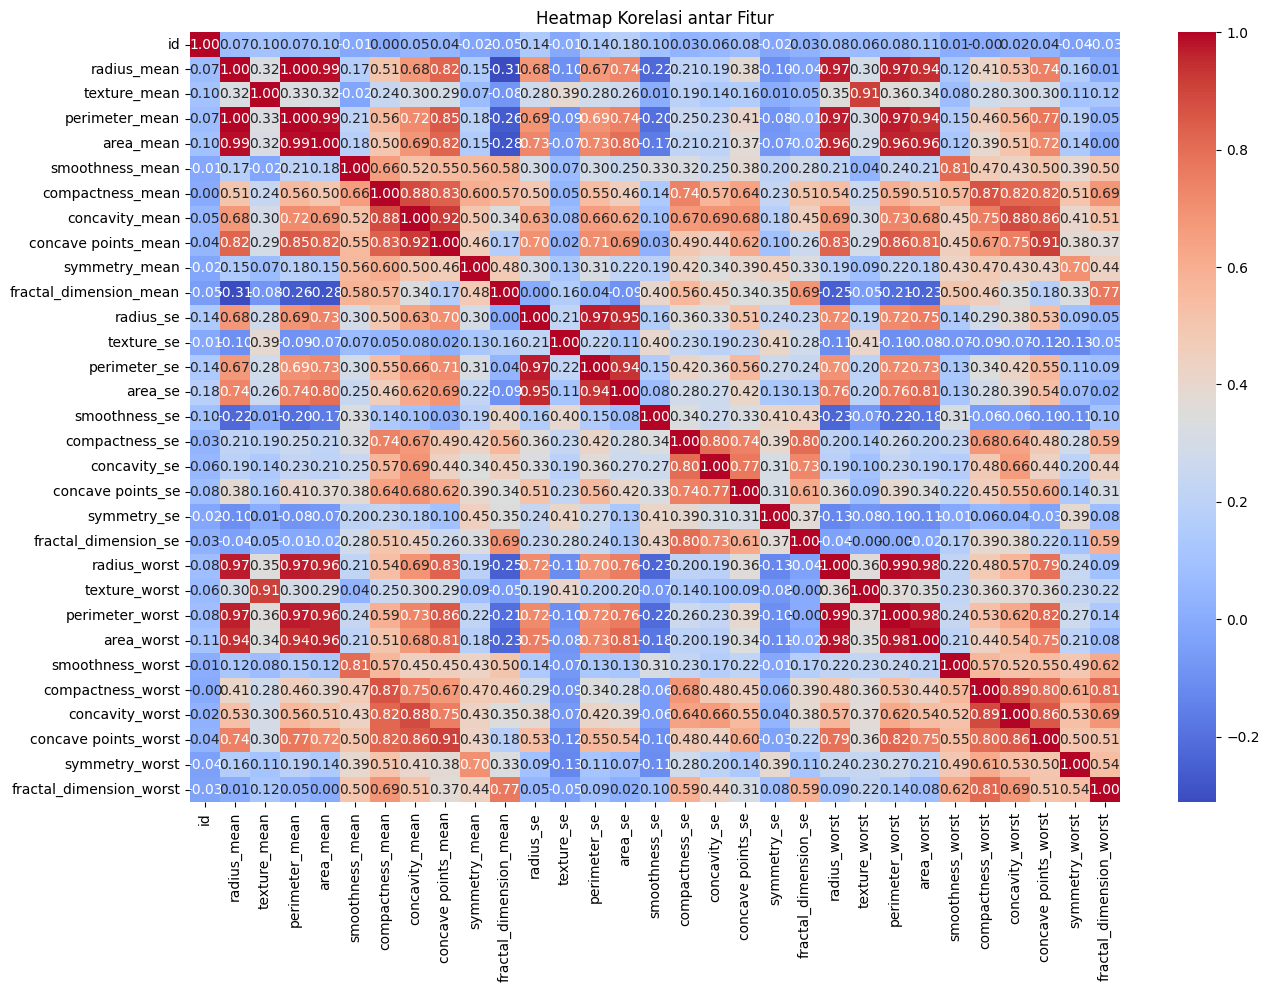

In [67]:
heatmap dari matriks korelasi
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antar Fitur')
plt.show()

# **4. Standarisasi Data**

In [68]:
# Fitur penting yang kamu tentukan
selected_features = [
    'radius_mean',
    'perimeter_mean',
    'area_mean',
    'concavity_mean',
    'concave points_mean',
    'radius_worst',
    'perimeter_worst'
]

# Tambahkan label diagnosis
selected_features.append('diagnosis')

# Ambil hanya fitur penting
df_selected = df[selected_features].copy()

# Encode label diagnosis (M = 1, B = 0)
le = LabelEncoder()
df_selected['diagnosis'] = le.fit_transform(df_selected['diagnosis'])

In [73]:
df_selected.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,diagnosis
0,17.99,122.80,1001.0,0.3001,0.14710,25.38,184.60,1
1,20.57,132.90,1326.0,0.0869,0.07017,24.99,158.80,1
2,19.69,130.00,1203.0,0.1974,0.12790,23.57,152.50,1
3,11.42,77.58,386.1,0.2414,0.10520,14.91,98.87,1
4,20.29,135.10,1297.0,0.1980,0.10430,22.54,152.20,1


In [75]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   radius_mean          569 non-null    float64
 1   perimeter_mean       569 non-null    float64
 2   area_mean            569 non-null    float64
 3   concavity_mean       569 non-null    float64
 4   concave points_mean  569 non-null    float64
 5   radius_worst         569 non-null    float64
 6   perimeter_worst      569 non-null    float64
 7   diagnosis            569 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 35.7 KB


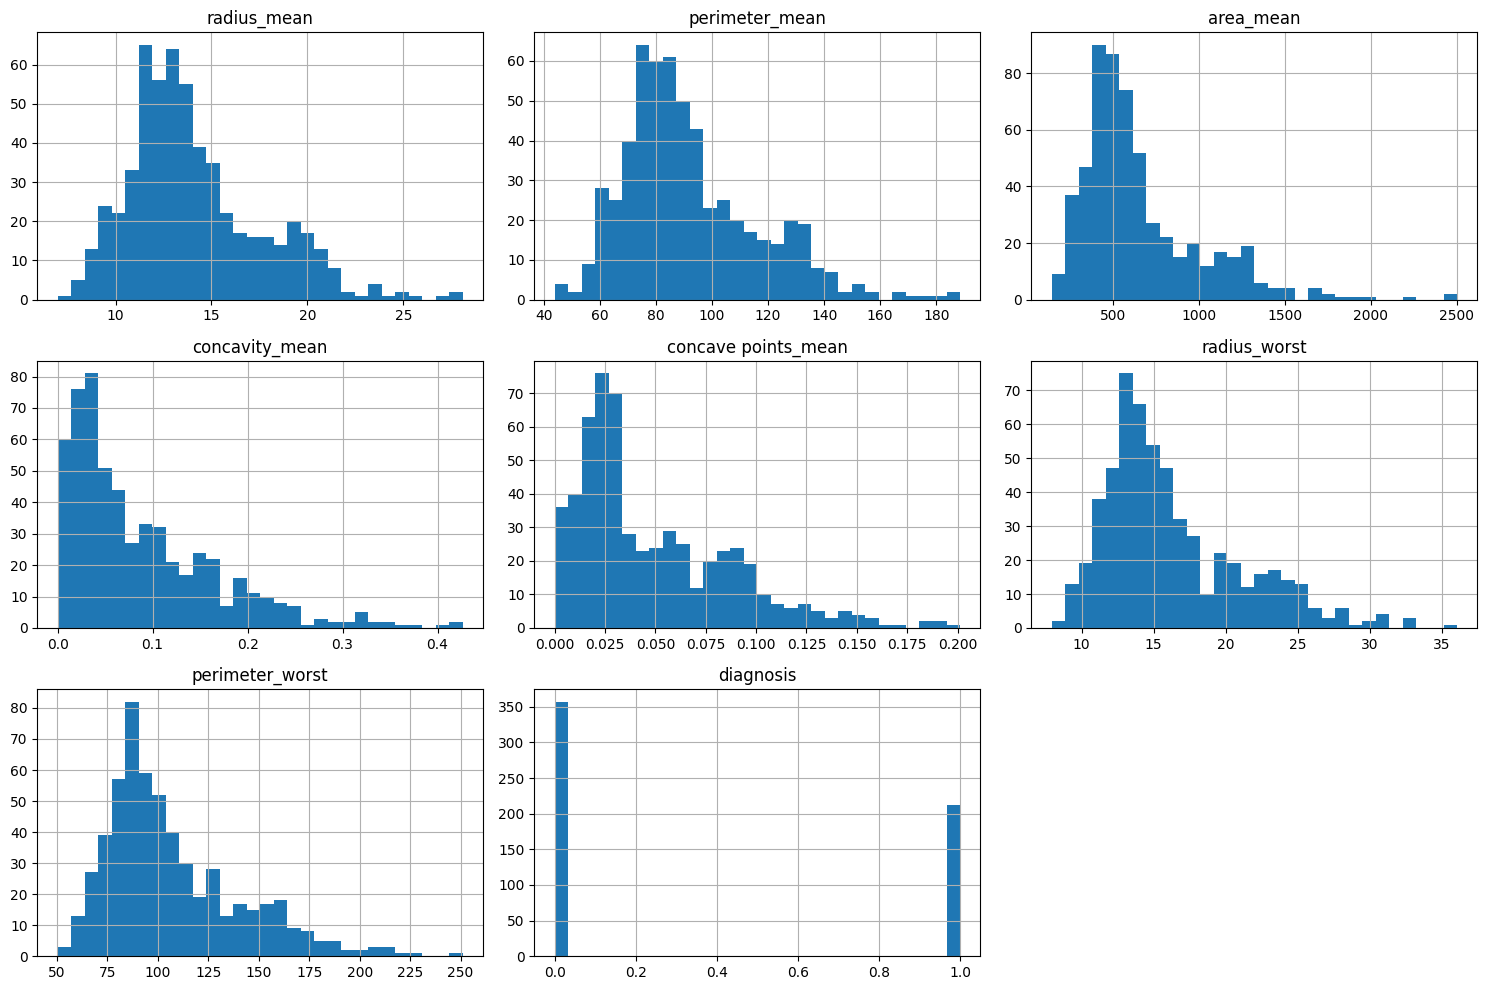

In [79]:
#Visualisasi histogram untuk setiap fitur
df_selected.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

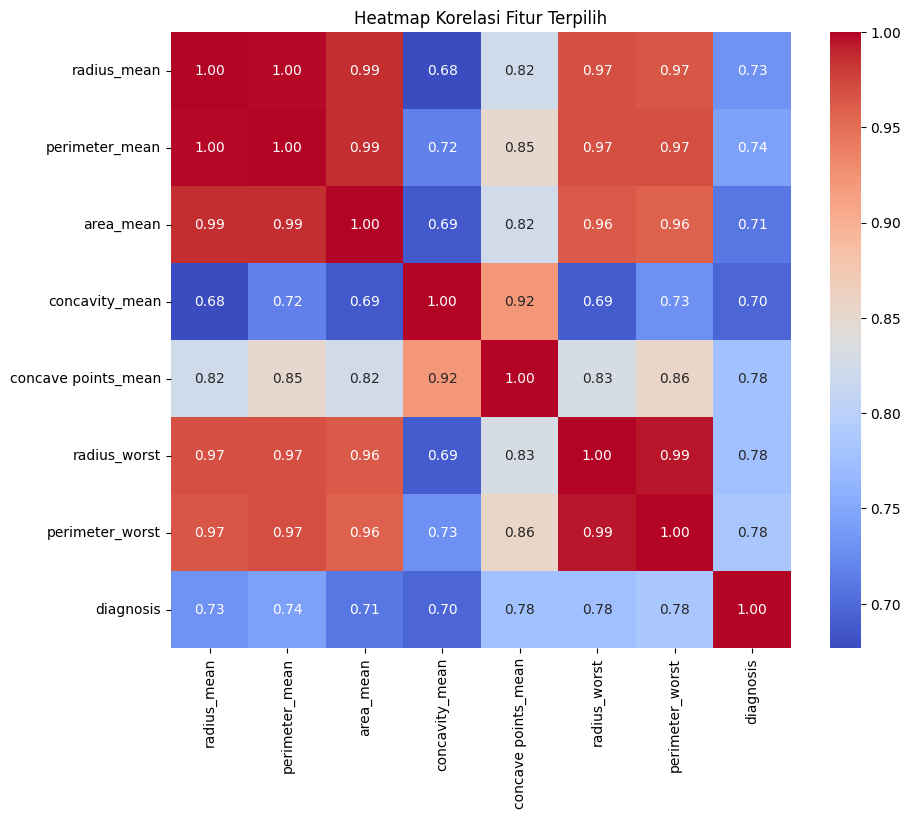

In [78]:
# prompt: buatkan heatmap yang baru untuk selected data

# Buat heatmap dari matriks korelasi untuk data yang dipilih
plt.figure(figsize=(10, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Terpilih')
plt.show()

# **5. PEMISAHAN DATA DAN LABEL**

In [80]:
# Pisahkan fitur dan label
X = df_selected.drop('diagnosis', axis=1)
y = df_selected['diagnosis']

# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **6. MEMBUAT DATA LATIH DAN TESTING**

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# **7. MEMBUAT MODEL & AKURASI**

# A. model SVM

In [71]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Akurasi SVM (7 fitur):", round(acc * 100, 2), "%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Akurasi SVM (7 fitur): 97.37 %

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# **8. CONFUSION MATRIX**

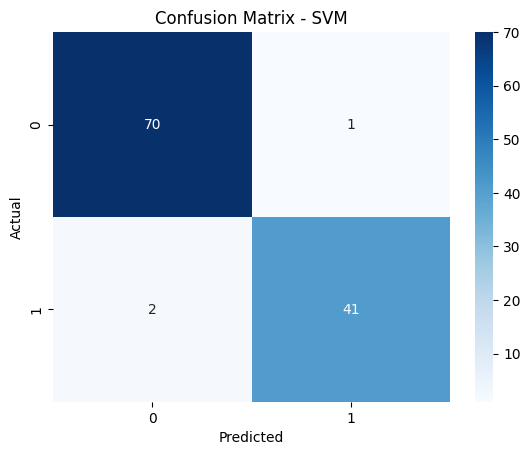

In [72]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# B. Model KNN

Akurasi KNN (7 fitur): 98.25 %

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        71
           1       0.96      1.00      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



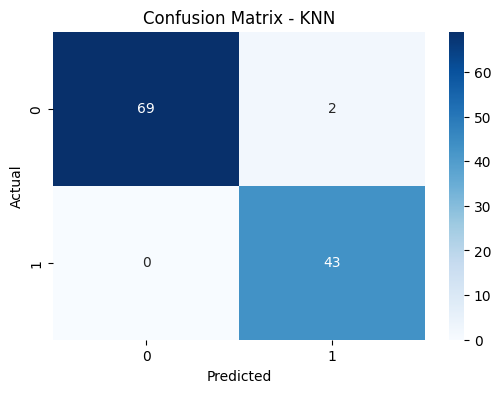

In [88]:
knn_model = KNeighborsClassifier(n_neighbors=5) # Anda bisa menyesuaikan nilai n_neighbors
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
print("Akurasi KNN (7 fitur):", round(acc_knn * 100, 2), "%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()